In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
 # Declare a Base using `automap_base()`
Base = automap_base()

# reflect an existing database into a new model
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurements = Base.classes.measurement

stations = Base.classes.measurement

In [10]:
#Inspect tables in database, to collect column metadata.
#Create inspector and connecting it to the engine object
inspector = inspect(engine)

#Inspect columns in 'measurements' table
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
#Inspect columns in 'station' table
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [62]:
# Find the most recent date in the data set.
#https://stackoverflow.com/questions/4186062/sqlalchemy-order-by-descending
mostRecentDate = session.query(measurements.date).order_by(measurements.date.desc()).first()[0]

In [64]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. Convert str date to datetime object.
#https://www.geeksforgeeks.org/python-datetime-strptime-function/
latestDateObj = datetime.strptime(mostRecentDate.replace("-","/"),"%Y/%m/%d")

# Calculate the date one year from the last date in data set.
#https://www.geeksforgeeks.org/how-to-add-and-subtract-days-using-datetime-in-python/
latestDateMinusOneYear = latestDateObj - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(measurements.date,measurements.prcp).filter(measurements.date >= latestDateMinusOneYear).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names, and drop any entires with NaN values.
#prcp_df = pd.DataFrame(data, columns=['Date','Precipitation']).dropna()
prcp_df = pd.DataFrame(data, columns=['Date','Precipitation']).dropna()

# Sort the dataframe by date, store in new DataFrame for plotting.
sorted_prcp = prcp_df.sort_values(by = 'Date')


In [65]:
#create xtick lists using 155 as a factor for 2015 (count of date values in dataframe) for even x-axis lable spacing.
all_dates = (sorted_prcp.Date).to_list()
x_tickVal = [d for n, d in enumerate(all_dates) if n%155==0]
x_locVal = [n for n, d in enumerate(all_dates) if n%155==0]

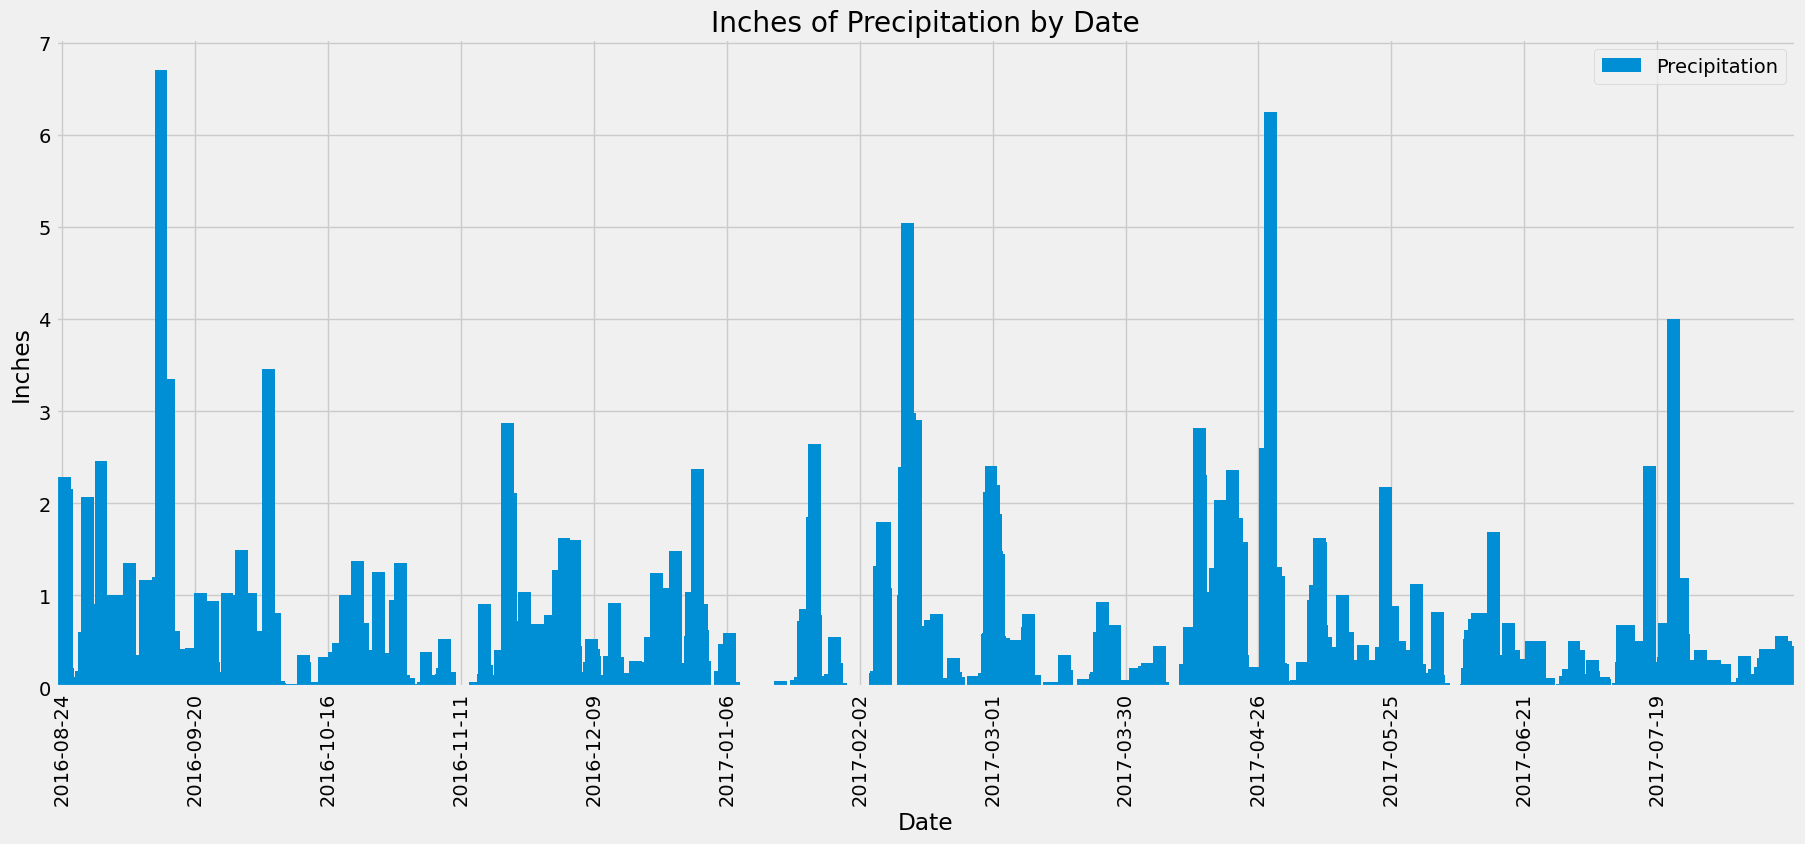

In [66]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = sorted_prcp.plot.bar(x='Date',
                        y='Precipitation',
                        xlabel='Date',
                        ylabel='Inches',
                        title='Inches of Precipitation by Date',
                        rot=90,
                        width = 15,
                        figsize=(20,8)
                       )
plt.xticks(x_locVal,x_tickVal)

plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
#https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html
sorted_prcp.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number of stations in the dataset


19550

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

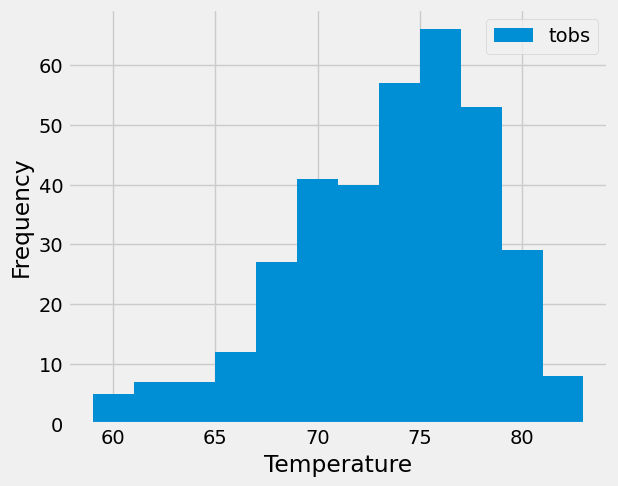

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [41]:
# Close Session
session.close()